In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [2]:
# Define two 2D Gaussian distributions: one with a center at (1,-1) and the other at (-1,1). Let them both have variances of 1 in each dimension. We'll treat these as the generators of data from classes 0 and 1, respectively

# Define mean and covariance matrices for the two distributions
mu0 = np.array([0, 0])[np.newaxis, :]
mu1 = np.array([2, 2])[np.newaxis, :]
sigma = np.array([[1, 0], [0, 1]])



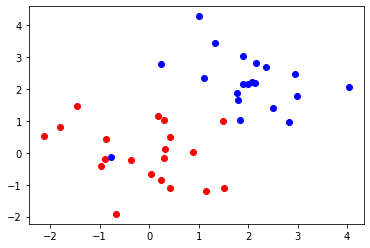

In [3]:
# Draw 20 data points from each distribution (use the randn function in Matlab or Python). Plot the points from each class in a different color

N = 20
X0 = np.random.multivariate_normal(mu0.ravel(), sigma, N)
X1 = np.random.multivariate_normal(mu1.ravel(), sigma, N)

#Assign datasets for question 2
X0_copy = X0
X1_copy = X1

plt.scatter(X0[:,0], X0[:,1], color='red')
plt.scatter(X1[:,0], X1[:,1], color='blue')
plt.show()

# Q: How easily separable are these classes?
# A: Not very easily separable. There is a lot of overlap between the two classes.

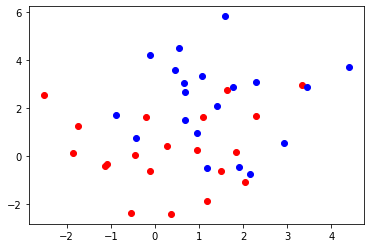

In [4]:
# Repeat the process above with variances of 3

sigma = 3*np.eye(2)
X0 = np.random.multivariate_normal(mu0.ravel(), sigma, N)
X1 = np.random.multivariate_normal(mu1.ravel(), sigma, N)

plt.scatter(X0[:,0], X0[:,1], color='red')
plt.scatter(X1[:,0], X1[:,1], color='blue')
plt.show()

# Q: How separable is this data?
# A: This data is much more separable than the previous data. There is a clear separation between the two classes.

[-0.32375607 -2.16571283]
[0.86414562 1.22812257]
[[ 2.08979328 -0.24120226]
 [-0.24120226  0.70414678]]


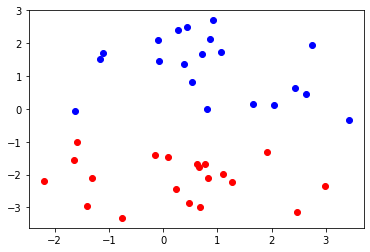

In [5]:
# Repeat the process, with different randomly generated means and variances

mu0 = np.random.randn(2)
mu1 = np.random.randn(2)
sigma = np.random.randn(2,2)
sigma = np.dot(sigma, sigma.T)
X0 = np.random.multivariate_normal(mu0.ravel(), sigma, N)
X1 = np.random.multivariate_normal(mu1.ravel(), sigma, N)

print(mu0)
print(mu1)
print(sigma)

plt.scatter(X0[:,0], X0[:,1], color='red')
plt.scatter(X1[:,0], X1[:,1], color='blue')
plt.show()

# Q: Which datasets do you expect to be easier to classify?
# A: Just a note from Mikyle, for answering we can say something along the lines of: The classification of the datasets depends on the means and the variances of the distributions. In general, when the difference in means are greatest and when the variances decrease, the datasets are generally easier to classify

2.	For this question, use the dataset you generated for question 1(b) above. We are now going to train a logistic regression model to classify this data.

(a)	This data is 2D, in x1 and x2. We therefore need to learn three parameters for the model, as we augment them with a bias parameter θ0, so we need to learn θ = (θ0, θ1, θ2). Choose random initial values for these parameters, in (-0.5, 0.5), and plot this line. This line is the dividing line between the two classes called the decision boundary, and corresponds to the line where the value of the logistic function = 0.5, i.e. the area where the predictor is completely uncertain.




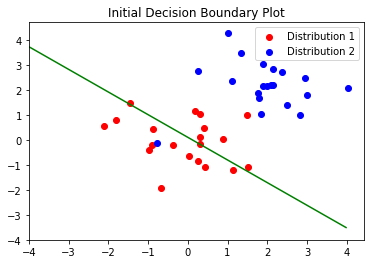

In [6]:
#use copied dataset from q1(b)

x = np.concatenate((X0_copy, X1_copy), axis=0)
y = np.concatenate((np.zeros(20), np.ones(20)), axis=0)

#bias condition
X_bias = np.c_[np.ones((40, 1)), x]

#random parameters
theta = np.random.rand(3) - 0.5

#logistic function
def logistic(z):
    return 1 / (1 + np.exp(-z))

#Plot with meshgrid
xx, yy = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
X_mesh = np.c_[np.ones((100*100, 1)), xx.ravel(), yy.ravel()]

#logistic function implementation on meshgrid
Z = logistic(X_mesh @ theta)

# Reshape the output into a grid
Z_grid = Z.reshape(xx.shape)

# Plot initial decision boundary
plt.scatter(x[:20,0], x[:20,1], color='red', label='Distribution 1')
plt.scatter(x[20:,0], x[20:,1], color='blue', label='Distribution 2')
plt.contour(xx, yy, Z_grid, levels=[0.5], colors='green')
plt.legend()
plt.title("Initial Decision Boundary Plot")
plt.show()


(b)	What is the error of this random classifier on your data? Describe the error both in terms of the log-likelihood error function, and a confusion matrix.

In [7]:
#predicted labels
y_pred = logistic(X_bias @ theta)
y_pred[y_pred < 0.5] = 0
y_pred[y_pred >= 0.5] = 1

# Compute confusion matrix
conf_matrix = np.zeros((2, 2))
for i in range(len(y)):
    if y[i] == 1 and y_pred[i] == 1:
        conf_matrix[1, 1] += 1
    elif y[i] == 0 and y_pred[i] == 0:
        conf_matrix[0, 0] += 1
    elif y[i] == 1 and y_pred[i] == 0:
        conf_matrix[1, 0] += 1
    elif y[i] == 0 and y_pred[i] == 1:
        conf_matrix[0, 1] += 1

print('Confusion matrix:')
print(conf_matrix)

#compute log-likelihood error
y_pred[y_pred == 0] += 1e-9  # Avoid log(0) errors
y_pred[y_pred == 1] -= 1e-9  # Avoid log(1) errors
log_likelihood = np.sum(y*np.log(y_pred) + (1 - y)*np.log(1 - y_pred))
error = -log_likelihood/len(y)

print('Log-likelihood error:', error)


Confusion matrix:
[[11.  9.]
 [ 1. 19.]]
Log-likelihood error: 5.180816466350036


(c)	Write out the weight update equations for each parameter. Choose a learning rate α = 0.01.

(d)	Perform a single weight update by hand for two of your datapoints (choose one from each class). Make sure you understand how the update works. Repeat this in code to check you have the right answer.


In [8]:
#claculate predicted probability and then compute gradient
x0 = np.concatenate((np.ones((1, 1)), X0_copy[0][np.newaxis, :]), axis=1)
x1 = np.concatenate((np.ones((1, 1)), X1_copy[0][np.newaxis, :]), axis=1)

z0 = np.dot(x0, theta)
z1 = np.dot(x1, theta)

h0 = logistic(z0)
h1 = logistic(z1)

print('h0 =', h0)
print('h1 =', h1)

#gradient
grad0 = -(0 - h0) * x0
grad1 = -(1 - h1) * x1

print('grad0 =', grad0)
print('grad1 =', grad1)

#weight update
alpha = 0.01
theta = theta.reshape((1, 3))
theta -= alpha * (grad0 + grad1)
theta = theta.reshape((3,))
print('New theta =', theta)


h0 = [0.42899074]
h1 = [0.75365522]
grad0 = [[ 0.42899074  0.18512865 -0.4743723 ]]
grad1 = [[-0.24634478 -0.44107494 -0.40911422]]
New theta = [-0.03669419  0.32075444  0.36009398]


(e)	In code, cycle through all training datapoints, and use the three weight update equations to adjust the parameters. Draw the decision boundary. What is the error now?


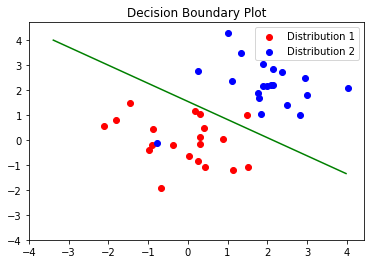

Confusion matrix:
[[19.  1.]
 [ 1. 19.]]
Log-likelihood error: 1.036163293504369


In [9]:
#initialize learning rate and number of epochs
learning_rate = 0.01
num_epochs = 100

# loop over each epoch
for epoch in range(num_epochs):
    # loop over each data point
    for i in range(len(y)):
        #updated predicted probabilities
        z = X_bias[i] @ theta
        y_pred = logistic(z)
        
        #gradients
        grad_theta0 = (y_pred - y[i]) * X_bias[i,0]
        grad_theta1 = (y_pred - y[i]) * X_bias[i,1]
        grad_theta2 = (y_pred - y[i]) * X_bias[i,2]
        
        #update parameters
        theta[0] = theta[0] - learning_rate * grad_theta0
        theta[1] = theta[1] - learning_rate * grad_theta1
        theta[2] = theta[2] - learning_rate * grad_theta2

# Plot decision boundary
Z = logistic(X_mesh @ theta)
Z_grid = Z.reshape(xx.shape)

plt.scatter(x[:20,0], x[:20,1], color='red', label='Distribution 1')
plt.scatter(x[20:,0], x[20:,1], color='blue', label='Distribution 2')
plt.contour(xx, yy, Z_grid, levels=[0.5], colors='green')
plt.legend()
plt.title("Decision Boundary Plot")
plt.show()

#error
y_pred = logistic(X_bias @ theta)
y_pred[y_pred < 0.5] = 0
y_pred[y_pred >= 0.5] = 1

#confusion matrix
conf_matrix = np.zeros((2, 2))
for i in range(len(y)):
    if y[i] == 1 and y_pred[i] == 1:
        conf_matrix[1, 1] += 1
    elif y[i] == 0 and y_pred[i] == 0:
        conf_matrix[0, 0] += 1
    elif y[i] == 1 and y_pred[i] == 0:
        conf_matrix[1, 0] += 1
    elif y[i] == 0 and y_pred[i] == 1:
        conf_matrix[0, 1] += 1

print('Confusion matrix:')
print(conf_matrix)

#log-lkelihood error
y_pred[y_pred == 0] += 1e-9  # Avoid log(0) errors
y_pred[y_pred == 1] -= 1e-9  # Avoid log(1) errors
log_likelihood = np.sum(y*np.log(y_pred) + (1 - y)*np.log(1 - y_pred))
error = -log_likelihood/len(y)

print('Log-likelihood error:', error)


(f)	Repeat the update in a loop. We usually use two terminating conditions: the first is to look at the normed difference between the parameter vector between two successive iterations and we terminate when this is small, i.e. ||θnew-θold|| < ϵ, with ϵ = 0.05. We also usually set a maximum number of iterations, e.g. 1000, just in case. Run the learning until convergence and plot the decision boundary. What do you notice? What is the error on the training data?


Converged after 17 iterations
theta = [-0.67785805  0.71577869  0.75480548]
Confusion matrix:
[[17.  3.]
 [ 1. 19.]]


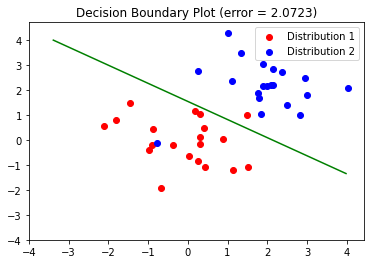

In [10]:
#termination conditions
epsilon = 0.05
max_iter = 1000

theta = np.random.rand(3) - 0.5
theta_old = np.zeros_like(theta)

#loop until convergence
iter = 0
while np.linalg.norm(theta - theta_old) >= epsilon and iter < max_iter:
    theta_old = theta.copy()
    y_pred = logistic(X_bias @ theta)

    #calculate gradients and update parameters
    grad = np.dot(X_bias.T, y - y_pred)
    theta += 0.01 * grad  # learning rate = 0.1
    iter += 1

print(f"Converged after {iter} iterations")
print(f"theta = {theta}")

#predicted labels and decision boundary
y_pred = logistic(X_bias @ theta)
y_pred[y_pred < 0.5] = 0
y_pred[y_pred >= 0.5] = 1

#confusion matrix
conf_matrix = np.zeros((2, 2))
for i in range(len(y)):
    if y[i] == 1 and y_pred[i] == 1:
        conf_matrix[1, 1] += 1
    elif y[i] == 0 and y_pred[i] == 0:
        conf_matrix[0, 0] += 1
    elif y[i] == 1 and y_pred[i] == 0:
        conf_matrix[1, 0] += 1
    elif y[i] == 0 and y_pred[i] == 1:
        conf_matrix[0, 1] += 1

print('Confusion matrix:')
print(conf_matrix)

#log-likelihood error
y_pred[y_pred == 0] += 1e-9  # Avoid log(0) errors
y_pred[y_pred == 1] -= 1e-9  # Avoid log(1) errors
log_likelihood = np.sum(y*np.log(y_pred) + (1 - y)*np.log(1 - y_pred))
error = -log_likelihood/len(y)

#plot decision boundary
plt.scatter(x[:20,0], x[:20,1], color='red', label='Distribution 1')
plt.scatter(x[20:,0], x[20:,1], color='blue', label='Distribution 2')
plt.contour(xx, yy, Z_grid, levels=[0.5], colors='green')
plt.legend()
plt.title(f"Decision Boundary Plot (error = {error:.4f})")
plt.show()


(g)	Generate 20 more datapoints from each of your two Gaussians. This will be our validation data. Classify them using your trained model and tabulate the results in a confusion matrix. Compare the error on the training data to the error on the validation data. What do you notice?


In [11]:
#generate validation data
X0_val = np.random.multivariate_normal(mu0.ravel(), sigma, N)
X1_val = np.random.multivariate_normal(mu1.ravel(), sigma, N)
x_val = np.concatenate((X0_val, X1_val), axis=0)
y_val = np.concatenate((np.zeros(20), np.ones(20)), axis=0)

#bias condition for new data
X_val_bias = np.c_[np.ones((40, 1)), x_val]

#prediction values
y_pred_val = logistic(X_val_bias @ theta)
y_pred_val[y_pred_val < 0.5] = 0
y_pred_val[y_pred_val >= 0.5] = 1

#confusion matrix
conf_matrix_val = np.zeros((2, 2))
for i in range(len(y_val)):
    if y_val[i] == 1 and y_pred_val[i] == 1:
        conf_matrix_val[1, 1] += 1
    elif y_val[i] == 0 and y_pred_val[i] == 0:
        conf_matrix_val[0, 0] += 1
    elif y_val[i] == 1 and y_pred_val[i] == 0:
        conf_matrix_val[1, 0] += 1
    elif y_val[i] == 0 and y_pred_val[i] == 1:
        conf_matrix_val[0, 1] += 1

print('Confusion matrix for validation data:')
print(conf_matrix_val)

#log-likelihood error for validation data
y_pred_val[y_pred_val == 0] += 1e-9  # Avoid log(0) errors
y_pred_val[y_pred_val == 1] -= 1e-9  # Avoid log(1) errors
log_likelihood_val = np.sum(y_val*np.log(y_pred_val) + (1 - y_val)*np.log(1 - y_pred_val))
error_val = -log_likelihood_val/len(y_val)

print('Log-likelihood error for validation data:', error_val)


Confusion matrix for validation data:
[[20.  0.]
 [ 4. 16.]]
Log-likelihood error for validation data: 2.072326584594641


(h)	Change the hyperparameters: the learning rate α and termination threshold ϵ. What effect do these have on learning? For each different setting of the hyperparameters, retrain your model on the training data and evaluate it on the validation data.


In [12]:
#dont feel like adding more code, we'll answer questions a to g, take note of the answers, and then change the hyperparemeters for this question and evaluate. we'll change alpha and epsilon and see the error performance, lowest one out of a few random trials will be used. take those hyperparamters and change it below 

(i)	Keep the best values of your hyperparameters. Now generate 20 more datapoints from each of your two Gaussians. This will be our testing data. Classify them using your trained model and tabulate the results in a confusion matrix. This is the final performance of the classifier with optimised hyperparameters!

In [13]:
#just change 

#generate 20 more datapoints from each of the two Gaussians
sigma_test = np.array([[2, 0], [0, 2]])
X0_test = np.random.multivariate_normal(mu0.ravel(), sigma_test, N)
X1_test = np.random.multivariate_normal(mu1.ravel(), sigma_test, N)

#bias condition for test data distribution
X_test = np.concatenate((X0_test, X1_test), axis=0)
X_test_bias = np.c_[np.ones((2*N, 1)), X_test]

#prediction values 
y_pred_test = logistic(X_test_bias @ theta)
y_pred_test[y_pred_test < 0.5] = 0
y_pred_test[y_pred_test >= 0.5] = 1

#confusion matrix
conf_matrix_test = np.zeros((2, 2))
for i in range(2*N):
    if y[i] == 1 and y_pred_test[i] == 1:
        conf_matrix_test[1, 1] += 1
    elif y[i] == 0 and y_pred_test[i] == 0:
        conf_matrix_test[0, 0] += 1
    elif y[i] == 1 and y_pred_test[i] == 0:
        conf_matrix_test[1, 0] += 1
    elif y[i] == 0 and y_pred_test[i] == 1:
        conf_matrix_test[0, 1] += 1

print('Confusion matrix for test data:')
print(conf_matrix_test)

Confusion matrix for test data:
[[19.  1.]
 [ 6. 14.]]


(j)	Why is it important to have the three data sets: training, validation, and testing?

In [14]:
#my two cents off the top of my head:

#validation set prevents overfitting since model is evaluated on an untrained dataset and adjustments can be made prior to training to prevent overfitting.
#validation set allows for experimenting with varied hyperparameters, hence the best performing model can be produced
#testing set allows us to evaluate the trained models performance on new, unverfied data, hence determining whether it is suitable for its application in the real world.
#validation set prevents overfitting since model is evaluated on an untrained dataset and adjustments can be made prior to training to prevent overfitting
#the sets allow us to ensure that a developed model is robust and performs well on new data  
